

#  Logistic Regression

### Loading of Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv("C:/Users/kenny/Desktop/New folder/Social_Network_Ads.csv")
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

### Plotting of Data

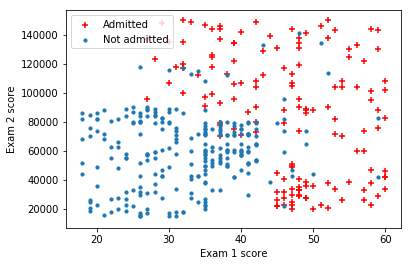

In [6]:
pos , neg = (y==1).reshape(400,1) , (y==0).reshape(400,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [7]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [8]:
# performing a test computation with the sigmoid function
sigmoid(0)

0.5

In [9]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### Feature scaling

In [10]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [11]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.6931471805599467
Gradient at initial theta (zeros): [[ 0.1425    ]
 [-0.29831974]
 [-0.17353327]]


### Gradient Descent

In [12]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [13]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [14]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[-1.13811482]
 [ 2.44456097]
 [ 1.22257273]]
The cost of the optimized theta: 0.34631422799604816


### Visualizing plot of Cost Function

Text(0.5,1,'Cost function using Gradient Descent')

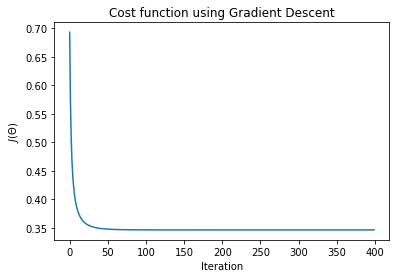

In [15]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Decision boundary



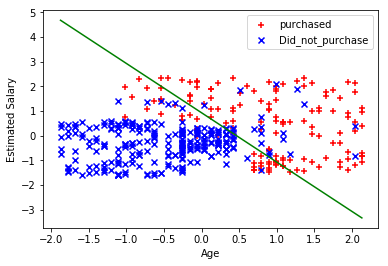

In [16]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="purchased")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Did_not_purchase")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend(loc=0)

### Prediction

In [17]:
def ClassifierPredict(theta,X):
    predictions=X.dot(theta)
    return predictions>0
  

### Accuracy on training set 

In [18]:
p=ClassifierPredict(theta,X)
accuracy = 100*((sum(p==y)[0])/len(y))
print("Train Accuracy:", accuracy,"%")

Train Accuracy: 84.5 %
